In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [26]:
def smib_equations(t, y, M, D, Pm, Pg, E, V, X1, X2, H, omega_n, t_fault, t_clear, fault_duration):
    """
    Defines the swing equations for a Single Machine Infinite Bus (SMIB) system with a three-phase fault.

    Parameters:
    t : float
        Time variable (not used explicitly, but required by solve_ivp)
    y : array_like
        State variables [delta, omega]
    M : float
        Machine Inertia constant (in seconds)
    D : float
        Damping coefficient
    Pm : float
        Mechanical power input (pu)
    Pg : float
        Electrical power output (pu)
    V : float
        Terminal voltage (pu)
    X : float
        Synchronous reactance (pu)
    H : float
        Machine's inertia constant (pu*second)
    omega_n : float
        Nominal system frequency (in radians per second)
    t_fault : float
        Time of fault occurrence (seconds)
    t_clear : float
        Time when the fault is cleared (seconds)
    fault_duration : float
        Duration of the fault (seconds)

    Returns:
    dydt : array_like
        Derivatives of the state variables
    """
    delta, omega = y
    
    # Define the swing equations
    if t_fault <= t and t <= t_clear:
        # During the fault period
        ddelta_dt = omega
        # domega_dt = (1 / M) * (Pm - Pg - D * (omega - omega_n) - E*V / X2 * np.sin(delta))
        domega_dt = (1 / M) * (Pm - D * (omega) - (E*V / X2) * np.sin(delta))
    
        # print("here")
    else:
        # After the fault is cleared
        ddelta_dt = omega
        domega_dt = (1 / M) * (Pm - D * (omega) - (E*V / X1) * np.sin(delta))

    return [ddelta_dt, domega_dt]

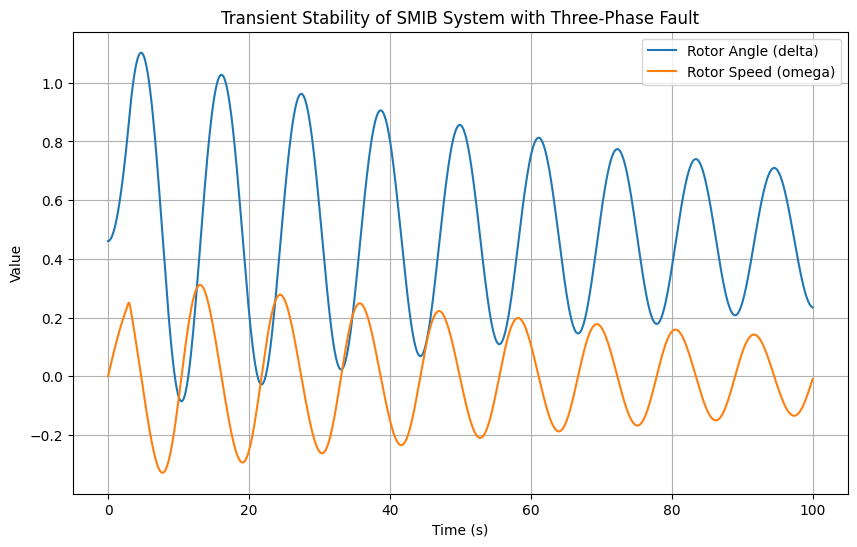

In [51]:
# Simulation parameters
t_span = (0, 100)  # Simulation time span (seconds)
t_eval = np.linspace(t_span[0], t_span[1], 1000)  # Time points where solution will be evaluated
initial_conditions = [0.46055, 0]  # Initial conditions [delta_0, omega_0]

# System parameters (pu values)
M = 5  # Inertia constant (pu*seconds)
# D = 0.1  # Damping coefficient
D = 0.1  # Damping coefficient

Pm = 0.8  # Mechanical power input (pu)
# Pg = 1  # Electrical power output (up)
Pg = 0  # Electrical power output (pu)

V = 1  # Terminal voltage (pu)
X1 = 0.65  # Synchronous reactance (up)
X2 = 1.8
E= 1.17
H = 5  # Machine's inertia constant (pu*seconds)
# omega_n = 2 * np.pi * 60  # Nominal system frequency (radians per second)
omega_n = 0


# Time of fault occurrence and clearance
t_fault = 0  # Time of fault occurrence (seconds)
fault_duration = 3 # Duration of the fault (seconds)
t_clear = t_fault + fault_duration  # Time when the fault is cleared (seconds)

# Solve the ODEs
solution = solve_ivp(
    fun=lambda t, y: smib_equations(t, y, M, D, Pm, Pg,E,  V, X1, X2, H, omega_n, t_fault, t_clear, fault_duration),
    t_span=t_span,
    y0=initial_conditions,
    t_eval=t_eval,
    method='RK45'
)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(solution.t, solution.y[0], label='Rotor Angle (delta)')
plt.plot(solution.t, solution.y[1], label='Rotor Speed (omega)')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.title('Transient Stability of SMIB System with Three-Phase Fault')
plt.legend()
plt.grid(True)
plt.show()